In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import ldspec
import zipfile

# autoreload
%load_ext autoreload
%autoreload 2

### Unfinished .score.gz files

In [2]:
SNP_RANGE_FILE="/n/groups/price/martin/LDSPEC_data/UKBimp_337K_MAF001_chimp/ukb_imp_v3.snp_range.txt"
SNP_RANGE_FILE_UF="/n/groups/price/martin/LDSPEC_data/UKBimp_337K_MAF001_chimp/ukb_imp_v3.snp_range.pannot.uf.txt"

SCORE_FILE_LIST = [
    # full scores
#     '/n/scratch3/users/j/jz286/imp_geno_chimp.score_annot/ukb_imp_v3.@_score.tsv.gz',
#     '/n/scratch3/users/j/jz286/imp_geno_chimp.score_pannot/pannot.@_score.tsv.gz',
#     '/n/scratch3/users/j/jz286/imp_geno_chimp.score_pannot_baseline_0_100/ukb_imp_v3.@_score.tsv.gz',
#     '/n/scratch3/users/j/jz286/imp_geno_chimp.score_pannot_baseline_0_1000/ukb_imp_v3.@_score.tsv.gz',
#     '/n/scratch3/users/j/jz286/imp_geno_chimp.score_pannot_basic/ukb_imp_v3.@_score.tsv.gz',
#     '/n/scratch3/users/j/jz286/imp_geno_chimp.score_pannot_baseline_0_100_ld/ukb_imp_v3.@_score.tsv.gz',
#     '/n/scratch3/users/j/jz286/imp_geno_chimp.score_pannot_baseline_0_1000_ld/ukb_imp_v3.@_score.tsv.gz',
#     '/n/scratch3/users/j/jz286/imp_geno_chimp.score_pannot_gene/ukb_imp_v3.@_score.tsv.gz',
#     # score_annot
#     '/n/scratch3/users/j/jz286/imp_geno_chimp.score_annot.1e6/ukb_imp_v3.@_score.tsv.gz',
#     '/n/scratch3/users/j/jz286/imp_geno_chimp.score_annot.3e6/ukb_imp_v3.@_score.tsv.gz',
#     '/n/scratch3/users/j/jz286/imp_geno_chimp.score_annot.5e6/ukb_imp_v3.@_score.tsv.gz',
#     '/n/scratch3/users/j/jz286/imp_geno_chimp.score_annot.1e7/ukb_imp_v3.@_score.tsv.gz',
    # score_pannot_basic
    '/n/scratch3/users/j/jz286/imp_geno_chimp.score_pannot_basic.1e6/ukb_imp_v3.@_score.tsv.gz',
    '/n/scratch3/users/j/jz286/imp_geno_chimp.score_pannot_basic.3e6/ukb_imp_v3.@_score.tsv.gz',
    '/n/scratch3/users/j/jz286/imp_geno_chimp.score_pannot_basic.5e6/ukb_imp_v3.@_score.tsv.gz',
    # score_pannot_gene
    '/n/scratch3/users/j/jz286/imp_geno_chimp.score_pannot_gene.1e6/ukb_imp_v3.@_score.tsv.gz',
    '/n/scratch3/users/j/jz286/imp_geno_chimp.score_pannot_gene.3e6/ukb_imp_v3.@_score.tsv.gz',
    '/n/scratch3/users/j/jz286/imp_geno_chimp.score_pannot_gene.5e6/ukb_imp_v3.@_score.tsv.gz',
    # score_pannot_baseline_0_100_ld
    '/n/scratch3/users/j/jz286/imp_geno_chimp.score_pannot_baseline_0_100_ld.1e6/ukb_imp_v3.@_score.tsv.gz',
    '/n/scratch3/users/j/jz286/imp_geno_chimp.score_pannot_baseline_0_100_ld.3e6/ukb_imp_v3.@_score.tsv.gz',
    '/n/scratch3/users/j/jz286/imp_geno_chimp.score_pannot_baseline_0_100_ld.5e6/ukb_imp_v3.@_score.tsv.gz',
    # score_pannot_baseline_0_1000_ld
    '/n/scratch3/users/j/jz286/imp_geno_chimp.score_pannot_baseline_0_1000_ld.1e6/ukb_imp_v3.@_score.tsv.gz',
    '/n/scratch3/users/j/jz286/imp_geno_chimp.score_pannot_baseline_0_1000_ld.3e6/ukb_imp_v3.@_score.tsv.gz',
    '/n/scratch3/users/j/jz286/imp_geno_chimp.score_pannot_baseline_0_1000_ld.5e6/ukb_imp_v3.@_score.tsv.gz',
]

snp_range_list = []
with open(SNP_RANGE_FILE, "r") as f:
    for line in f:
        snp_range_list.append(line.strip())
snp_range_list = snp_range_list[:117]

for SCORE_FILE in SCORE_FILE_LIST:
    print(SCORE_FILE)
    snp_range_uf_list = []
    for snp_range in snp_range_list:
        score_file = SCORE_FILE.replace("@", snp_range)
        if os.path.exists(score_file):
            temp_df = pd.read_csv(score_file, sep="\t", index_col=None, nrows=5)
            if temp_df.isna().sum().sum()==0:
                continue            
        snp_range_uf_list.append(snp_range)

    with open(SNP_RANGE_FILE_UF, "w") as f:
        for snp_range in snp_range_uf_list:
            f.write("%s\n" % snp_range)
        
    print("%d/%d unfinished" % (len(snp_range_uf_list), len(snp_range_list)))

/n/scratch3/users/j/jz286/imp_geno_chimp.score_pannot_basic.1e6/ukb_imp_v3.@_score.tsv.gz
0/117 unfinished
/n/scratch3/users/j/jz286/imp_geno_chimp.score_pannot_basic.3e6/ukb_imp_v3.@_score.tsv.gz
0/117 unfinished
/n/scratch3/users/j/jz286/imp_geno_chimp.score_pannot_basic.5e6/ukb_imp_v3.@_score.tsv.gz
0/117 unfinished
/n/scratch3/users/j/jz286/imp_geno_chimp.score_pannot_gene.1e6/ukb_imp_v3.@_score.tsv.gz
0/117 unfinished
/n/scratch3/users/j/jz286/imp_geno_chimp.score_pannot_gene.3e6/ukb_imp_v3.@_score.tsv.gz
0/117 unfinished
/n/scratch3/users/j/jz286/imp_geno_chimp.score_pannot_gene.5e6/ukb_imp_v3.@_score.tsv.gz
0/117 unfinished
/n/scratch3/users/j/jz286/imp_geno_chimp.score_pannot_baseline_0_100_ld.1e6/ukb_imp_v3.@_score.tsv.gz
0/117 unfinished
/n/scratch3/users/j/jz286/imp_geno_chimp.score_pannot_baseline_0_100_ld.3e6/ukb_imp_v3.@_score.tsv.gz
0/117 unfinished
/n/scratch3/users/j/jz286/imp_geno_chimp.score_pannot_baseline_0_100_ld.5e6/ukb_imp_v3.@_score.tsv.gz
0/117 unfinished
/n/s

In [3]:
# Write as per-CHR score files
SNP_RANGE_FILE='/n/groups/price/martin/LDSPEC_data/UKBimp_337K_MAF001/ukb_imp_v3.snp_range.txt'
snp_range_list = []
with open(SNP_RANGE_FILE, "r") as f:
    for line in f:
        snp_range_list.append(line.strip())
snp_range_list = snp_range_list[:117] # first 117 score files

for SCORE_FILE,PREFIX_OUT in [
    # full scores
#     ['/n/scratch3/users/j/jz286/imp_geno_chimp.score_annot/ukb_imp_v3.@_score.tsv.gz',
#      '/n/groups/price/martin/data_GDREG/UKBimp_337K_MAF001_chimp/gdreg_score_file/baseline'],
#     ['/n/scratch3/users/j/jz286/imp_geno_chimp.score_pannot/pannot.@_score.tsv.gz',
#      '/n/groups/price/martin/data_GDREG/UKBimp_337K_MAF001_chimp/gdreg_score_file/pannot'],
#     ['/n/scratch3/users/j/jz286/imp_geno_chimp.score_pannot_basic/ukb_imp_v3.@_score.tsv.gz',
#      '/n/groups/price/martin/data_GDREG/UKBimp_337K_MAF001_chimp/gdreg_score_file/pannot_basic'],
#     ['/n/scratch3/users/j/jz286/imp_geno_chimp.score_pannot_baseline_0_100/ukb_imp_v3.@_score.tsv.gz',
#      '/n/groups/price/martin/data_GDREG/UKBimp_337K_MAF001_chimp/gdreg_score_file/pannot_baseline_0_100'],
#     ['/n/scratch3/users/j/jz286/imp_geno_chimp.score_pannot_baseline_0_1000/ukb_imp_v3.@_score.tsv.gz',
#      '/n/groups/price/martin/data_GDREG/UKBimp_337K_MAF001_chimp/gdreg_score_file/pannot_baseline_0_1000'],
#     ['/n/scratch3/users/j/jz286/imp_geno_chimp.score_pannot_basic/ukb_imp_v3.@_score.tsv.gz',
#      '/n/groups/price/martin/LDSPEC_data/UKBimp_337K_MAF001_chimp/ldspec_score_file'],    
#     ['/n/scratch3/users/j/jz286/imp_geno_chimp.score_pannot_baseline_0_100_ld/ukb_imp_v3.@_score.tsv.gz',
#      '/n/groups/price/martin/LDSPEC_data/UKBimp_337K_MAF001_chimp/ldspec_score_file/pannot_baseline_0_100_ld'],
#     ['/n/scratch3/users/j/jz286/imp_geno_chimp.score_pannot_baseline_0_1000_ld/ukb_imp_v3.@_score.tsv.gz',
#      '/n/groups/price/martin/LDSPEC_data/UKBimp_337K_MAF001_chimp/ldspec_score_file/pannot_baseline_0_1000_ld'],
#     ['/n/scratch3/users/j/jz286/imp_geno_chimp.score_pannot_gene/ukb_imp_v3.@_score.tsv.gz',
#      '/n/groups/price/martin/LDSPEC_data/UKBimp_337K_MAF001_chimp/ldspec_score_file/pannot_gene_ld'],
#     # score_annot
#     ['/n/scratch3/users/j/jz286/imp_geno_chimp.score_annot.1e6/ukb_imp_v3.@_score.tsv.gz',
#      '/n/groups/price/martin/data_GDREG/UKBimp_337K_MAF001_chimp/gdreg_score_file/chr1_vary_winsize/baseline.1e6'],
#     ['/n/scratch3/users/j/jz286/imp_geno_chimp.score_annot.2e6/ukb_imp_v3.@_score.tsv.gz',
#      '/n/groups/price/martin/data_GDREG/UKBimp_337K_MAF001_chimp/gdreg_score_file/chr1_vary_winsize/baseline.2e6'],
#     ['/n/scratch3/users/j/jz286/imp_geno_chimp.score_annot.3e6/ukb_imp_v3.@_score.tsv.gz',
#      '/n/groups/price/martin/data_GDREG/UKBimp_337K_MAF001_chimp/gdreg_score_file/chr1_vary_winsize/baseline.3e6'],
#     ['/n/scratch3/users/j/jz286/imp_geno_chimp.score_annot.5e6/ukb_imp_v3.@_score.tsv.gz',
#      '/n/groups/price/martin/data_GDREG/UKBimp_337K_MAF001_chimp/gdreg_score_file/chr1_vary_winsize/baseline.5e6'],
#     ['/n/scratch3/users/j/jz286/imp_geno_chimp.score_annot.1e7/ukb_imp_v3.@_score.tsv.gz',
#      '/n/groups/price/martin/data_GDREG/UKBimp_337K_MAF001_chimp/gdreg_score_file/chr1_vary_winsize/baseline.1e7'],
    # score_pannot_basic
    ['/n/scratch3/users/j/jz286/imp_geno_chimp.score_pannot_basic.1e6/ukb_imp_v3.@_score.tsv.gz',
     '/n/groups/price/martin/LDSPEC_data/UKBimp_337K_MAF001_chimp/ldspec_score_file/chr1_vary_winsize/pannot_prox_ld.1e6'],
    ['/n/scratch3/users/j/jz286/imp_geno_chimp.score_pannot_basic.3e6/ukb_imp_v3.@_score.tsv.gz',
     '/n/groups/price/martin/LDSPEC_data/UKBimp_337K_MAF001_chimp/ldspec_score_file/chr1_vary_winsize/pannot_prox_ld.3e6'],
    ['/n/scratch3/users/j/jz286/imp_geno_chimp.score_pannot_basic.5e6/ukb_imp_v3.@_score.tsv.gz',
     '/n/groups/price/martin/LDSPEC_data/UKBimp_337K_MAF001_chimp/ldspec_score_file/chr1_vary_winsize/pannot_prox_ld.5e6'],
    # score_pannot_gene
    ['/n/scratch3/users/j/jz286/imp_geno_chimp.score_pannot_gene.1e6/ukb_imp_v3.@_score.tsv.gz',
     '/n/groups/price/martin/LDSPEC_data/UKBimp_337K_MAF001_chimp/ldspec_score_file/chr1_vary_winsize/pannot_gene_ld.1e6'],
    ['/n/scratch3/users/j/jz286/imp_geno_chimp.score_pannot_gene.3e6/ukb_imp_v3.@_score.tsv.gz',
     '/n/groups/price/martin/LDSPEC_data/UKBimp_337K_MAF001_chimp/ldspec_score_file/chr1_vary_winsize/pannot_gene_ld.3e6'],
    ['/n/scratch3/users/j/jz286/imp_geno_chimp.score_pannot_gene.5e6/ukb_imp_v3.@_score.tsv.gz',
     '/n/groups/price/martin/LDSPEC_data/UKBimp_337K_MAF001_chimp/ldspec_score_file/chr1_vary_winsize/pannot_gene_ld.5e6'],
    # score_pannot_baseline_0_100_ld
    ['/n/scratch3/users/j/jz286/imp_geno_chimp.score_pannot_baseline_0_100_ld.1e6/ukb_imp_v3.@_score.tsv.gz',
     '/n/groups/price/martin/LDSPEC_data/UKBimp_337K_MAF001_chimp/ldspec_score_file/chr1_vary_winsize/pannot_baseline_0_100_ld.1e6'],
    ['/n/scratch3/users/j/jz286/imp_geno_chimp.score_pannot_baseline_0_100_ld.3e6/ukb_imp_v3.@_score.tsv.gz',
     '/n/groups/price/martin/LDSPEC_data/UKBimp_337K_MAF001_chimp/ldspec_score_file/chr1_vary_winsize/pannot_baseline_0_100_ld.3e6'],
    ['/n/scratch3/users/j/jz286/imp_geno_chimp.score_pannot_baseline_0_100_ld.5e6/ukb_imp_v3.@_score.tsv.gz',
     '/n/groups/price/martin/LDSPEC_data/UKBimp_337K_MAF001_chimp/ldspec_score_file/chr1_vary_winsize/pannot_baseline_0_100_ld.5e6'],
    # score_pannot_baseline_0_1000_ld
    ['/n/scratch3/users/j/jz286/imp_geno_chimp.score_pannot_baseline_0_1000_ld.1e6/ukb_imp_v3.@_score.tsv.gz',
     '/n/groups/price/martin/LDSPEC_data/UKBimp_337K_MAF001_chimp/ldspec_score_file/chr1_vary_winsize/pannot_baseline_0_1000_ld.1e6'],
    ['/n/scratch3/users/j/jz286/imp_geno_chimp.score_pannot_baseline_0_1000_ld.3e6/ukb_imp_v3.@_score.tsv.gz',
     '/n/groups/price/martin/LDSPEC_data/UKBimp_337K_MAF001_chimp/ldspec_score_file/chr1_vary_winsize/pannot_baseline_0_1000_ld.3e6'],
    ['/n/scratch3/users/j/jz286/imp_geno_chimp.score_pannot_baseline_0_1000_ld.5e6/ukb_imp_v3.@_score.tsv.gz',
     '/n/groups/price/martin/LDSPEC_data/UKBimp_337K_MAF001_chimp/ldspec_score_file/chr1_vary_winsize/pannot_baseline_0_1000_ld.5e6'],
]:   
    print(SCORE_FILE)
#     for CHR in range(1,23):
    for CHR in [1]:
        if os.path.exists(PREFIX_OUT + ".c%d_score.tsv.gz" % CHR):
            continue
        snp_range_list_chr = [x for x in snp_range_list if x.startswith("c%s_" % CHR)]
        df_list = []
        for snp_range in snp_range_list_chr:
            df_list.append(pd.read_csv(SCORE_FILE.replace("@", snp_range), sep="\t", index_col=None))
        df_score_chr = pd.concat(df_list, axis=0)    
        col_list = [x for x in df_score_chr if x.startswith(("E", "LD", "DLD"))]
        df_score_chr[col_list] = df_score_chr[col_list].astype(np.float32)
        df_score_chr.to_csv(PREFIX_OUT + ".c%d_score.tsv.gz" % CHR, sep="\t", index=False, compression="gzip")
        print(
            "CHR%d"%CHR,
            "n_file=%d" % len(snp_range_list_chr),
            "n_snp=%d" % df_score_chr.shape[0],
            "n_col=%d" % df_score_chr.shape[1],
            "n_na=%d" % df_score_chr.isna().sum().sum(),
        )
    print("")

/n/scratch3/users/j/jz286/imp_geno_chimp.score_pannot_basic.1e6/ukb_imp_v3.@_score.tsv.gz
CHR1 n_file=117 n_snp=1161341 n_col=34 n_na=0

/n/scratch3/users/j/jz286/imp_geno_chimp.score_pannot_basic.3e6/ukb_imp_v3.@_score.tsv.gz
CHR1 n_file=117 n_snp=1161341 n_col=34 n_na=0

/n/scratch3/users/j/jz286/imp_geno_chimp.score_pannot_basic.5e6/ukb_imp_v3.@_score.tsv.gz
CHR1 n_file=117 n_snp=1161341 n_col=34 n_na=0

/n/scratch3/users/j/jz286/imp_geno_chimp.score_pannot_gene.1e6/ukb_imp_v3.@_score.tsv.gz
CHR1 n_file=117 n_snp=1161341 n_col=34 n_na=0

/n/scratch3/users/j/jz286/imp_geno_chimp.score_pannot_gene.3e6/ukb_imp_v3.@_score.tsv.gz
CHR1 n_file=117 n_snp=1161341 n_col=34 n_na=0

/n/scratch3/users/j/jz286/imp_geno_chimp.score_pannot_gene.5e6/ukb_imp_v3.@_score.tsv.gz
CHR1 n_file=117 n_snp=1161341 n_col=34 n_na=0

/n/scratch3/users/j/jz286/imp_geno_chimp.score_pannot_baseline_0_100_ld.1e6/ukb_imp_v3.@_score.tsv.gz
CHR1 n_file=117 n_snp=1161341 n_col=32 n_na=0

/n/scratch3/users/j/jz286/imp_ge

### Check score

In [3]:
n_snp=int(1e4)
dic_score = {}
dic_score['new'] = pd.read_csv(
    '/n/groups/price/martin/LDSPEC_data/UKBimp_337K_MAF001_chimp/ldspec_score_file/chr1_vary_winsize/pannot_baseline_0_100_ld.1e6.c1_score.tsv.gz',
    sep="\t", index_col=None, nrows=n_snp
)
dic_score['old'] = pd.read_csv(
    '/n/groups/price/martin/LDSPEC_data/UKBimp_337K_MAF001_chimp/ldspec_score_file/pannot_baseline_0_100_ld.c1_score.tsv.gz',
    sep="\t", index_col=None, nrows=n_snp
)
# dic_score['new'] = pd.read_csv(
#     '/n/scratch3/users/j/jz286/imp_geno_chimp.score_annot/ukb_imp_v3.c1_s0_e10000_score.tsv.gz',
#     sep="\t", index_col=None, nrows=n_snp
# )

In [4]:
np.corrcoef(
    dic_score['new']['DLD:pAN:H3K27ac_Hnisz_proxy_0_100_ld_p0_p100_maf_common_block'],
    dic_score['old']['DLD:pAN:H3K27ac_Hnisz_proxy_0_100_ld_p0_p100_maf_common_block'],
)[0,1]

0.9999941173076865

In [8]:
dic_score['old']

,CHR,SNP,BP,E,DLD:pAN:H3K27ac_Hnisz_proxy_0_100_ld_p0_p100_maf_common_block,DLD:pAN:H3K27ac_Hnisz_proxy_0_100_ld_p0_p100_maf_lf_block,DLD:pAN:H3K27ac_PGC2_proxy_0_100_ld_p0_p100_maf_common_block,DLD:pAN:H3K27ac_PGC2_proxy_0_100_ld_p0_p100_maf_lf_block,DLD:pAN:H3K4me1_Trynka_proxy_0_100_ld_p0_p100_maf_common_block,DLD:pAN:H3K4me1_Trynka_proxy_0_100_ld_p0_p100_maf_lf_block,...,DLD:pAN:H3K4me1_Trynka_proxy_0_100_ld_n100_p0_maf_common_block,DLD:pAN:H3K4me1_Trynka_proxy_0_100_ld_n100_p0_maf_lf_block,DLD:pAN:Intron_UCSC_proxy_0_100_ld_n100_p0_maf_common_block,DLD:pAN:Intron_UCSC_proxy_0_100_ld_n100_p0_maf_lf_block,DLD:pAN:Repressed_Hoffman_proxy_0_100_ld_n100_p0_maf_common_block,DLD:pAN:Repressed_Hoffman_proxy_0_100_ld_n100_p0_maf_lf_block,DLD:pAN:SuperEnhancer_Hnisz_proxy_0_100_ld_n100_p0_maf_common_block,DLD:pAN:SuperEnhancer_Hnisz_proxy_0_100_ld_n100_p0_maf_lf_block,DLD:pAN:Transcribed_Hoffman_proxy_0_100_ld_n100_p0_maf_common_block,DLD:pAN:Transcribed_Hoffman_proxy_0_100_ld_n100_p0_maf_lf_block
0,1,1:66435_ATT_A,66435,0.999023,0.083152,0.319283,0.058123,0.110729,0.098516,0.303718,...,-0.086312,-0.078652,-0.097810,-0.084765,-0.010571,-0.000790,-0.041022,-0.090033,-0.112949,-0.061541
1,1,rs555652149,70352,0.988138,0.322806,0.001061,0.313618,0.007090,0.791190,0.010309,...,-0.685320,-0.004851,-0.955322,-0.004290,-0.056605,-0.000655,-0.165949,-0.006680,-1.049855,-0.003380
2,1,rs531531651,85988,0.995694,0.362529,0.005642,0.132211,0.004393,0.253821,0.006084,...,-0.209905,-0.019924,-0.094423,-0.006226,-0.030150,-0.003946,-0.184876,-0.006382,-0.185222,-0.009064
3,1,rs185487977,88370,0.989844,0.774319,0.077445,0.613527,0.061502,0.306646,0.073375,...,-0.115303,-0.006667,-0.401178,-0.003588,-0.368746,-0.000380,-0.061217,-0.004613,-0.049902,-0.007069
4,1,rs548107800,98608,0.993152,0.061734,0.008305,0.031066,0.001342,0.057601,0.008261,...,-0.056927,-0.001964,-0.025241,-0.002298,-0.009970,-0.001499,-0.051079,-0.001379,-0.046284,-0.001725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,rs375103598,2406497,0.997524,0.252601,8.165287,0.102534,9.916926,0.228538,6.912641,...,-0.108294,-2.014923,-0.061693,-3.573929,-0.020819,-0.084582,-0.046661,-0.171606,-0.053060,-0.089020
9996,1,1:2406757_GGAGCCAGTA_G,2406757,0.976860,0.972215,0.241647,0.598141,0.253233,0.792781,0.238154,...,-0.598809,-0.088651,-0.396307,-0.032551,-0.090765,-0.006607,-0.338112,-0.033591,-0.325676,-0.017271
9997,1,rs13376356,2406887,0.912952,4.654247,0.393865,2.744181,0.478122,3.543277,0.326255,...,-2.586991,-0.004499,-1.689659,-0.209024,-0.239286,-0.049370,-1.452711,-0.098582,-0.708863,-0.018772
9998,1,rs113336587,2406990,0.991025,0.969220,0.035259,0.554183,0.033652,0.847179,0.032556,...,-0.671814,-0.066401,-0.490610,-0.031315,-0.150625,-0.004643,-0.295293,-0.053237,-0.280817,-0.034642


In [7]:
dic_score['new'][['DLD:pAN:H3K27ac_Hnisz_proxy_0_100_ld_p0_p100_maf_common_block',
                  'DLD:pAN:H3K27ac_Hnisz_proxy_0_100_ld_n100_p0_maf_common_block'
                 ]].sum(axis=1)

0       0.015493
1      -0.010771
2       0.113453
3       0.312839
4       0.003730
          ...   
9995    0.124694
9996    0.302996
9997    1.692705
9998    0.233686
9999    0.135837
Length: 10000, dtype: float64

In [8]:
dic_score['old']

,CHR,SNP,BP,E,DLD:pAN:H3K27ac_Hnisz_0_100_common_common,DLD:pAN:H3K27ac_Hnisz_0_100_common_lf,DLD:pAN:H3K27ac_Hnisz_0_100_lf_lf,DLD:pAN:H3K27ac_PGC2_0_100_common_common,DLD:pAN:H3K27ac_PGC2_0_100_common_lf,DLD:pAN:H3K27ac_PGC2_0_100_lf_lf,...,DLD:pAN:H3K4me1_Trynka_0_100_lf_lf,DLD:pAN:Intron_UCSC_0_100_common_common,DLD:pAN:Intron_UCSC_0_100_common_lf,DLD:pAN:Intron_UCSC_0_100_lf_lf,DLD:pAN:Repressed_Hoffman_0_100_common_common,DLD:pAN:Repressed_Hoffman_0_100_common_lf,DLD:pAN:Repressed_Hoffman_0_100_lf_lf,DLD:pAN:Transcribed_Hoffman_0_100_common_common,DLD:pAN:Transcribed_Hoffman_0_100_common_lf,DLD:pAN:Transcribed_Hoffman_0_100_lf_lf
0,1,1:66435_ATT_A,66435,0.999023,0.015493,-0.014389,0.228216,0.007638,-0.003070,0.080537,...,0.225067,0.042545,-0.009864,0.150315,0.002595,-0.002787,0.000399,0.037982,-0.001209,-0.032409
1,1,rs555652149,70352,0.988138,-0.010771,-0.001427,-0.005007,0.028678,-0.010801,0.004784,...,0.005458,0.094371,0.012312,0.006836,0.037205,-0.001078,0.000775,0.254970,0.002171,-0.003968
2,1,rs531531651,85988,0.995694,0.113454,0.065121,-0.017809,0.021598,0.028508,-0.010870,...,-0.013840,0.056545,0.035902,0.000050,0.008897,-0.000177,-0.002391,0.097775,0.036160,-0.003015
3,1,rs185487977,88370,0.989844,0.312839,0.024385,0.070655,0.197744,0.015118,0.058013,...,0.066708,0.164997,0.001779,0.003379,0.207023,-0.001203,0.000619,0.027254,0.023088,0.062371
4,1,rs548107800,98608,0.993152,0.003730,0.000576,0.006575,-0.006366,0.001221,0.000383,...,0.006296,-0.005237,-0.000655,0.002449,0.000415,-0.000461,-0.000048,-0.015327,-0.000430,0.000620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,rs375103598,2406497,0.997524,0.124693,-0.397351,5.710261,0.049580,-0.295782,6.591476,...,4.897723,0.080043,-0.539935,7.655911,0.010276,-0.020308,0.041796,0.054115,-0.181641,1.806538
9996,1,1:2406757_GGAGCCAGTA_G,2406757,0.976860,0.302996,-0.438728,-0.136657,0.124631,-0.152516,0.211914,...,0.149503,0.247034,0.016031,0.043630,0.007413,-0.081162,0.004090,0.036788,-0.008901,0.007289
9997,1,rs13376356,2406887,0.912952,1.692714,1.886551,0.271998,0.438090,1.441687,0.379639,...,0.321755,0.839394,0.658456,0.126983,0.063137,0.043579,-0.035242,-0.081366,-0.034719,0.187546
9998,1,rs113336587,2406990,0.991025,0.233687,0.047308,-0.032684,0.081573,0.098189,0.011857,...,-0.033845,0.173382,0.130819,0.006393,0.006256,0.015718,0.010152,0.053654,0.017010,-0.009588


In [9]:
dic_score['prox_ld']['DLD:pAN:proxy_100_1000_ld_full_maf_common_block'] + \
dic_score['prox_ld']['DLD:pAN:proxy_0_100_ld_full_maf_common_block']

0         0.146189
1         1.184967
2         0.603958
3         0.599529
4         0.147143
           ...    
99995     7.737976
99996    21.899365
99997    -1.234446
99998    22.945209
99999     0.262308
Length: 100000, dtype: float64

In [10]:
dic_score['prox_ld_old']['DLD:pAN:proxy_0_1000_ld_full_maf_common_block']

0         0.146189
1         1.184963
2         0.603959
3         0.599530
4         0.147143
           ...    
99995     7.738003
99996    21.899399
99997    -1.234444
99998    22.945293
99999     0.262307
Name: DLD:pAN:proxy_0_1000_ld_full_maf_common_block, Length: 100000, dtype: float64

In [3]:
dld_list = [x for x in dic_score['basic'] if x.startswith('DLD')]
df_corr = dic_score['basic'][dld_list].corr()
for i in range(len(dld_list)):
    for j in range(i+1, len(dld_list)):
        if np.absolute(df_corr.iloc[i,j]) > 0.8:
            print('cor=%0.3f \t %s \t %s' % (df_corr.iloc[i,j], dld_list[i], dld_list[j]))

cor=-0.938 	 DLD:pAN:proxy_0_1000_ld_p0_p100_common_mbin0 	 DLD:pAN:proxy_0_1000_ld_n100_p0_common_mbin0
cor=-0.977 	 DLD:pAN:proxy_0_1000_ld_p0_p100_common_mbin1 	 DLD:pAN:proxy_0_1000_ld_n100_p0_common_mbin1
cor=-0.975 	 DLD:pAN:proxy_0_1000_ld_p0_p100_common_mbin2 	 DLD:pAN:proxy_0_1000_ld_n100_p0_common_mbin2
cor=-0.985 	 DLD:pAN:proxy_0_1000_ld_p0_p100_common_mbin3 	 DLD:pAN:proxy_0_1000_ld_n100_p0_common_mbin3
cor=-0.995 	 DLD:pAN:proxy_0_1000_ld_p0_p100_common_mbin4 	 DLD:pAN:proxy_0_1000_ld_n100_p0_common_mbin4
cor=-0.983 	 DLD:pAN:proxy_0_1000_ld_p0_p100_lf_mbin0 	 DLD:pAN:proxy_0_1000_ld_n100_p0_lf_mbin0
cor=-0.918 	 DLD:pAN:proxy_0_1000_ld_p0_p100_lf_mbin1 	 DLD:pAN:proxy_0_1000_ld_n100_p0_lf_mbin1
cor=-0.810 	 DLD:pAN:proxy_0_1000_ld_p0_p100_lf_mbin1 	 DLD:pAN:proxy_0_1000_ld_n100_p0_lf
cor=0.962 	 DLD:pAN:proxy_0_1000_ld_p0_p100_lf_mbin1 	 DLD:pAN:proxy_0_1000_ld_p0_p100_lf
cor=0.898 	 DLD:pAN:proxy_0_1000_ld_n100_p0_lf_mbin1 	 DLD:pAN:proxy_0_1000_ld_n100_p0_lf
cor=-0.895

In [10]:
temp_list1 = [ 
    'DLD:pAN:proxy_0_1000_ld_p0_p100_lf_mbin0',
    'DLD:pAN:proxy_0_1000_ld_p0_p100_lf_mbin1',
    'DLD:pAN:proxy_0_1000_ld_p0_p100_common_mbin0',
    'DLD:pAN:proxy_0_1000_ld_p0_p100_common_mbin1',
    'DLD:pAN:proxy_0_1000_ld_p0_p100_common_mbin2',
    'DLD:pAN:proxy_0_1000_ld_p0_p100_common_mbin3',
    'DLD:pAN:proxy_0_1000_ld_p0_p100_common_mbin4',
]
temp_list2 = [  
    'DLD:pAN:proxy_0_1000_ld_n100_p0_lf_mbin0',
    'DLD:pAN:proxy_0_1000_ld_n100_p0_lf_mbin1',
    'DLD:pAN:proxy_0_1000_ld_n100_p0_common_mbin0',
    'DLD:pAN:proxy_0_1000_ld_n100_p0_common_mbin1',
    'DLD:pAN:proxy_0_1000_ld_n100_p0_common_mbin2',
    'DLD:pAN:proxy_0_1000_ld_n100_p0_common_mbin3',
    'DLD:pAN:proxy_0_1000_ld_n100_p0_common_mbin4',
]
temp_list3 = [
    'DLD:pAN:proxy_0_1000_ld_n100_p0_lf',
    'DLD:pAN:proxy_0_1000_ld_n100_p0_common',
    'DLD:pAN:proxy_0_1000_ld_p0_p100_lf',
    'DLD:pAN:proxy_0_1000_ld_p0_p100_common',
]

for temp_list in [temp_list1, temp_list2, temp_list3]:
    df_corr = dic_score['basic'][temp_list].corr()
    df_corr.columns = [x.replace('DLD:pAN:proxy_0_1000_ld_', '') for x in df_corr.columns]
    df_corr.columns = [x.replace('p0_p100_', '') for x in df_corr.columns]
    df_corr.index = [x.replace('DLD:pAN:proxy_0_1000_ld_', '') for x in df_corr.index]
    df_corr.index = [x.replace('p0_p100_', '') for x in df_corr.index]
    display(df_corr)

,lf_mbin0,lf_mbin1,common_mbin0,common_mbin1,common_mbin2,common_mbin3,common_mbin4
lf_mbin0,1.000000,0.076447,-0.013022,-0.019006,-0.032328,-0.030699,-0.014776
lf_mbin1,0.076447,1.000000,0.070869,-0.002100,-0.016095,-0.017034,-0.008318
common_mbin0,-0.013022,0.070869,1.000000,0.204815,0.073345,0.015723,-0.006821
common_mbin1,-0.019006,-0.002100,0.204815,1.000000,0.386915,0.148621,0.045444
common_mbin2,-0.032328,-0.016095,0.073345,0.386915,1.000000,0.426818,0.134858
common_mbin3,-0.030699,-0.017034,0.015723,0.148621,0.426818,1.000000,0.280043
common_mbin4,-0.014776,-0.008318,-0.006821,0.045444,0.134858,0.280043,1.000000


,n100_p0_lf_mbin0,n100_p0_lf_mbin1,n100_p0_common_mbin0,n100_p0_common_mbin1,n100_p0_common_mbin2,n100_p0_common_mbin3,n100_p0_common_mbin4
n100_p0_lf_mbin0,1.000000,0.086083,-0.011792,-0.018645,-0.029764,-0.028330,-0.012928
n100_p0_lf_mbin1,0.086083,1.000000,0.134122,-0.004351,-0.031086,-0.031310,-0.013494
n100_p0_common_mbin0,-0.011792,0.134122,1.000000,0.226724,0.044922,-0.016884,-0.018496
n100_p0_common_mbin1,-0.018645,-0.004351,0.226724,1.000000,0.392138,0.105602,0.013591
n100_p0_common_mbin2,-0.029764,-0.031086,0.044922,0.392138,1.000000,0.424474,0.114957
n100_p0_common_mbin3,-0.028330,-0.031310,-0.016884,0.105602,0.424474,1.000000,0.277891
n100_p0_common_mbin4,-0.012928,-0.013494,-0.018496,0.013591,0.114957,0.277891,1.000000


,n100_p0_lf,n100_p0_common,lf,common
n100_p0_lf,1.000000,-0.011868,-0.907997,0.008843
n100_p0_common,-0.011868,1.000000,0.007988,-0.990579
lf,-0.907997,0.007988,1.000000,-0.005079
common,0.008843,-0.990579,-0.005079,1.000000


In [17]:
dld_list = [x for x in dic_score['basic'] if x.startswith('DLD')]
df_corr = dic_score['basic'][dld_list].corr()

for term in ['ld_p0_p100', 'ld_n100_p0', 'ld_n100_p0', 'ld_p0_p100']:
for dld_list in [[]]
for i in range(len(dld_list)):
    for j in range(i+1, len(dld_list)):
        if np.absolute(df_corr.iloc[i,j]) > 0.8:
            print('cor=%0.3f \t %s \t %s' % (df_corr.iloc[i,j], dld_list[i], dld_list[j]))

,DLD:pAN:proxy_0_1000_ld_p0_p100_common_mbin0,DLD:pAN:proxy_0_1000_ld_p0_p100_common_mbin1,DLD:pAN:proxy_0_1000_ld_p0_p100_common_mbin2,DLD:pAN:proxy_0_1000_ld_p0_p100_common_mbin3,DLD:pAN:proxy_0_1000_ld_p0_p100_common_mbin4,DLD:pAN:proxy_0_1000_ld_p0_p100_lf_mbin0,DLD:pAN:proxy_0_1000_ld_p0_p100_lf_mbin1,DLD:pAN:proxy_0_1000_ld_n100_p0_common_mbin0,DLD:pAN:proxy_0_1000_ld_n100_p0_common_mbin1,DLD:pAN:proxy_0_1000_ld_n100_p0_common_mbin2,DLD:pAN:proxy_0_1000_ld_n100_p0_common_mbin3,DLD:pAN:proxy_0_1000_ld_n100_p0_common_mbin4,DLD:pAN:proxy_0_1000_ld_n100_p0_lf_mbin0,DLD:pAN:proxy_0_1000_ld_n100_p0_lf_mbin1,DLD:pAN:proxy_0_1000_ld_n100_p0_common,DLD:pAN:proxy_0_1000_ld_n100_p0_lf,DLD:pAN:proxy_0_1000_ld_p0_p100_common,DLD:pAN:proxy_0_1000_ld_p0_p100_lf
DLD:pAN:proxy_0_1000_ld_p0_p100_common_mbin0,1.000000,-0.019532,-0.048026,-0.053075,0.129433,-0.057903,-0.019591,-0.983879,-0.066214,0.122239,0.053884,-0.114388,0.058621,-0.079525,-0.637640,0.021780,0.672302,-0.054052
DLD:pAN:proxy_0_1000_ld_p0_p100_common_mbin1,-0.019532,1.000000,0.350644,0.077356,0.213632,-0.054278,-0.120219,-0.004669,-0.541731,-0.597998,-0.092437,-0.154747,0.057353,0.037998,-0.315164,0.052819,0.289158,-0.063636
DLD:pAN:proxy_0_1000_ld_p0_p100_common_mbin2,-0.048026,0.350644,1.000000,0.534954,0.863745,-0.166742,-0.242483,0.019676,-0.523381,-0.903049,-0.787974,-0.787834,0.167530,0.217094,-0.706979,0.183159,0.579498,-0.179344
DLD:pAN:proxy_0_1000_ld_p0_p100_common_mbin3,-0.053075,0.077356,0.534954,1.000000,0.568470,-0.184248,-0.270622,0.036348,-0.101940,-0.410583,-0.677053,-0.568048,0.187093,0.249581,-0.421977,0.206489,0.617766,-0.198514
DLD:pAN:proxy_0_1000_ld_p0_p100_common_mbin4,0.129433,0.213632,0.863745,0.568470,1.000000,-0.147058,-0.218052,-0.148712,-0.323715,-0.676662,-0.886139,-0.961605,0.148928,0.184691,-0.772296,0.160564,0.671314,-0.158705
DLD:pAN:proxy_0_1000_ld_p0_p100_lf_mbin0,-0.057903,-0.054278,-0.166742,-0.184248,-0.147058,1.000000,0.842131,0.079530,-0.011254,0.171968,0.173016,0.160653,-0.996689,-0.935674,0.190372,-0.992829,-0.187788,0.997640
DLD:pAN:proxy_0_1000_ld_p0_p100_lf_mbin1,-0.019591,-0.120219,-0.242483,-0.270622,-0.218052,0.842131,1.000000,0.076722,-0.017829,0.260472,0.242649,0.228752,-0.839575,-0.888677,0.249470,-0.863671,-0.235854,0.877169
DLD:pAN:proxy_0_1000_ld_n100_p0_common_mbin0,-0.983879,-0.004669,0.019676,0.036348,-0.148712,0.079530,0.076722,1.000000,0.023448,-0.082410,-0.036759,0.129200,-0.081305,0.022358,0.665763,-0.054137,-0.681126,0.080583
DLD:pAN:proxy_0_1000_ld_n100_p0_common_mbin1,-0.066214,-0.541731,-0.523381,-0.101940,-0.323715,-0.011254,-0.017829,0.023448,1.000000,0.595389,0.090311,0.266984,0.011367,0.106788,0.382248,0.037477,-0.335192,-0.012291
DLD:pAN:proxy_0_1000_ld_n100_p0_common_mbin2,0.122239,-0.597998,-0.903049,-0.410583,-0.676662,0.171968,0.260472,-0.082410,0.595389,1.000000,0.572108,0.617146,-0.171308,-0.226286,0.612208,-0.188459,-0.473961,0.186287


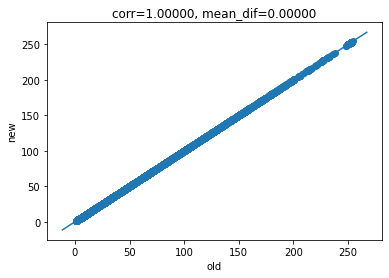

In [6]:
for md1,md2 in [['old','new']]:
    plt.figure()
    plt.scatter(dic_score[md1]['LD:AN:all'], dic_score[md2]['LD:AN:all'])
    min_ = max(plt.xlim()[0], plt.ylim()[0])
    max_ = max(plt.xlim()[1], plt.ylim()[1])
    plt.plot([min_, max_], [min_, max_])
    plt.title('corr=%0.5f, mean_dif=%0.5f' % 
              (np.corrcoef(dic_score[md1]['LD:AN:all'], dic_score[md2]['LD:AN:all'])[0,1],
               np.mean(dic_score[md2]['LD:AN:all']-dic_score[md1]['LD:AN:all'])
              ))
    plt.xlabel(md1)
    plt.ylabel(md2)
    plt.show()

In [5]:
dic_score['chr1']

,CHR,SNP,BP,E,LD:AN:Backgrd_Selection_Stat_common,LD:AN:Backgrd_Selection_Stat_lf,LD:AN:BivFlnk.flanking.500_common,LD:AN:BivFlnk.flanking.500_lf,LD:AN:BivFlnk_common,LD:AN:BivFlnk_lf,...,LD:AN:mbin8_common,LD:AN:mbin9_common,LD:AN:nucleotide_div_common,LD:AN:nucleotide_div_lf,LD:AN:recomb_rate_common,LD:AN:recomb_rate_lf,LD:AN:snpeff_nonsynonymous_variant_common,LD:AN:snpeff_nonsynonymous_variant_lf,LD:AN:snpeff_synonymous_variant_common,LD:AN:snpeff_synonymous_variant_lf
0,1,1:66435_ATT_A,66435,0.999023,0.024862,0.047527,0.055736,0.078518,0.063365,0.271123,...,0.037068,0.006372,1.981280,5.440871,0.517810,0.583701,0.001779,0.000710,0.003110,0.023409
1,1,rs555652149,70352,0.988138,0.182859,0.031157,0.522848,0.017412,0.505346,0.088794,...,0.148464,0.018229,16.363510,2.208628,3.613878,0.502290,0.033342,0.035687,0.082143,0.000788
2,1,rs531531651,85988,0.995694,0.105899,0.088730,0.140937,0.182846,0.141918,0.331866,...,0.078305,0.008179,4.691221,4.640179,0.737558,0.827335,0.003493,0.000821,0.010689,0.151618
3,1,rs185487977,88370,0.989844,0.048952,0.077004,0.099684,0.016143,0.132593,0.040516,...,0.051770,0.008250,3.429067,3.557381,2.449587,0.836239,0.008929,0.025592,0.005335,0.000532
4,1,rs548107800,98608,0.993152,0.013688,0.011038,0.040933,0.003132,0.043242,0.048604,...,0.030207,0.004448,1.305017,0.896111,0.421385,0.319391,0.000999,0.000391,0.000660,0.036714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,rs375103598,2406497,0.997524,0.091352,2.860088,0.140988,4.673918,0.109423,2.576410,...,0.119625,0.149978,5.332932,95.989150,1.989030,21.173233,0.008366,0.142004,0.004124,0.477939
9996,1,1:2406757_GGAGCCAGTA_G,2406757,0.976860,0.492779,0.952723,0.851017,1.158416,0.751116,1.743304,...,0.485892,0.814761,26.284285,55.387330,11.889597,21.817457,0.051407,0.410598,0.019254,0.066983
9997,1,rs13376356,2406887,0.912952,1.938273,0.598583,3.332791,0.606901,3.156325,0.754885,...,2.313961,3.234535,110.188430,28.071507,47.525593,8.239533,0.097128,0.071055,0.458558,0.046796
9998,1,rs113336587,2406990,0.991025,0.460274,0.394755,0.751662,0.348044,0.526086,1.497343,...,0.879298,0.922450,25.580230,28.597721,11.721655,18.217304,0.013374,0.003306,0.053707,0.001400


In [6]:
dic_score['full']

,CHR,SNP,BP,E,LD:AN:Backgrd_Selection_Stat_common,LD:AN:Backgrd_Selection_Stat_lf,LD:AN:BivFlnk.flanking.500_common,LD:AN:BivFlnk.flanking.500_lf,LD:AN:BivFlnk_common,LD:AN:BivFlnk_lf,...,LD:AN:mbin8_common,LD:AN:mbin9_common,LD:AN:nucleotide_div_common,LD:AN:nucleotide_div_lf,LD:AN:recomb_rate_common,LD:AN:recomb_rate_lf,LD:AN:snpeff_nonsynonymous_variant_common,LD:AN:snpeff_nonsynonymous_variant_lf,LD:AN:snpeff_synonymous_variant_common,LD:AN:snpeff_synonymous_variant_lf
0,1,1:66435_ATT_A,66435,0.999023,0.024865,0.047528,0.055736,0.078518,0.063365,0.271123,...,0.037068,0.006372,1.981390,5.440920,0.517827,0.583709,0.001779,0.000710,0.003110,0.023410
1,1,rs555652149,70352,0.988138,0.182860,0.031167,0.522848,0.017412,0.505346,0.088794,...,0.148464,0.018229,16.363580,2.209012,3.613888,0.502351,0.033342,0.035687,0.082143,0.000800
2,1,rs531531651,85988,0.995694,0.105902,0.088736,0.140937,0.182846,0.141918,0.331866,...,0.078305,0.008179,4.691336,4.640445,0.737576,0.827377,0.003493,0.000821,0.010689,0.151631
3,1,rs185487977,88370,0.989844,0.048957,0.077007,0.099684,0.016143,0.132593,0.040516,...,0.051770,0.008250,3.429267,3.557493,2.449617,0.836257,0.008929,0.025592,0.005335,0.000536
4,1,rs548107800,98608,0.993152,0.013688,0.011042,0.040933,0.003132,0.043242,0.048604,...,0.030207,0.004448,1.305031,0.896257,0.421387,0.319415,0.000999,0.000391,0.000660,0.036718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,rs375103598,2406497,0.997524,0.091370,2.860092,0.140988,4.673918,0.109423,2.576410,...,0.119625,0.149978,5.333144,95.989210,1.989038,21.173237,0.008366,0.142004,0.004124,0.477939
9996,1,1:2406757_GGAGCCAGTA_G,2406757,0.976860,0.492779,0.952764,0.851017,1.158416,0.751116,1.743304,...,0.485892,0.814761,26.284285,55.387833,11.889597,21.817476,0.051407,0.410598,0.019254,0.066983
9997,1,rs13376356,2406887,0.912952,1.938340,0.598583,3.332791,0.606901,3.156325,0.754885,...,2.313961,3.234535,110.189230,28.071507,47.525620,8.239533,0.097128,0.071055,0.458558,0.046796
9998,1,rs113336587,2406990,0.991025,0.460278,0.394763,0.751662,0.348044,0.526086,1.497343,...,0.879298,0.922450,25.580284,28.597824,11.721657,18.217308,0.013374,0.003306,0.053707,0.001400


In [103]:
n_snp=10000
dic_score = {}
dic_score['chr1'] = pd.read_csv(
    '/n/groups/price/martin/data_GDREG/UKBimp_337K_MAF001_chimp/gdreg_score_file/chr1_vary_winsize'
    '/baseline.1e6.c1_score.tsv.gz',
    sep="\t", index_col=None, nrows=n_snp
)
dic_score['full'] = pd.read_csv(
    '/n/groups/price/martin/data_GDREG/UKBimp_337K_MAF001_chimp/gdreg_score_file/baseline.c1_score.tsv.gz',
    sep="\t", index_col=None, nrows=n_snp
)

dic_score['ld1e6.win1e5'] = pd.read_csv(
    '/n/scratch3/users/j/jz286/imp_geno_chimp.score_annot.debug/ld1e6.win1e5.c1_s0_e10000_score.tsv.gz',
    sep="\t", index_col=None, nrows=n_snp
)
dic_score['ld1e6.win1e6'] = pd.read_csv(
    '/n/scratch3/users/j/jz286/imp_geno_chimp.score_annot.debug/ld1e6.win1e6.c1_s0_e10000_score.tsv.gz',
    sep="\t", index_col=None, nrows=n_snp
)
dic_score['ld1e7.win1e5'] = pd.read_csv(
    '/n/scratch3/users/j/jz286/imp_geno_chimp.score_annot.debug/ld1e7.win1e5.c1_s0_e10000_score.tsv.gz',
    sep="\t", index_col=None, nrows=n_snp
)
dic_score['ld1e7.win1e6'] = pd.read_csv(
    '/n/scratch3/users/j/jz286/imp_geno_chimp.score_annot.debug/ld1e7.win1e6.c1_s0_e10000_score.tsv.gz',
    sep="\t", index_col=None, nrows=n_snp
)
dic_score['ld1e7.win1e6.2'] = pd.read_csv(
    '/n/scratch3/users/j/jz286/imp_geno_chimp.score_annot.1e6/ukb_imp_v3.c1_s0_e10000_score.tsv.gz',
    sep="\t", index_col=None, nrows=n_snp
)

In [78]:
df_snp = pd.read_csv(
    '/n/scratch3/users/j/jz286/imp_geno_chimp/ukb_imp_chr1_v3_chimp.pvar', sep="\t", index_col=None, nrows=20000
)

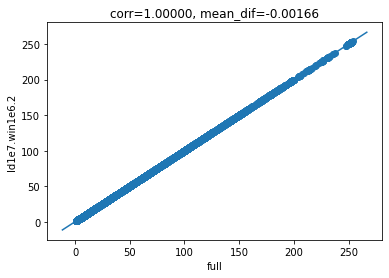

In [105]:
for md1,md2 in [['full','ld1e7.win1e6.2']]:
    plt.figure()
    plt.scatter(dic_score[md1]['LD:AN:all'], dic_score[md2]['LD:AN:all'])
    min_ = max(plt.xlim()[0], plt.ylim()[0])
    max_ = max(plt.xlim()[1], plt.ylim()[1])
    plt.plot([min_, max_], [min_, max_])
    plt.title('corr=%0.5f, mean_dif=%0.5f' % 
              (np.corrcoef(dic_score[md1]['LD:AN:all'], dic_score[md2]['LD:AN:all'])[0,1],
               np.mean(dic_score[md2]['LD:AN:all']-dic_score[md1]['LD:AN:all'])
              ))
    plt.xlabel(md1)
    plt.ylabel(md2)
    plt.show()

In [11]:
mat_ld1, dic_range1 = gdreg.util.read_ld(
    '/n/scratch3/users/j/jz286/imp_geno_chimp.gdreg_ld_win1e6/ukb_imp_v3_chimp.c1_s0_e10000_ld.npz'
)
mat_ld2, dic_range2 = gdreg.util.read_ld(
    '/n/scratch3/users/j/jz286/imp_geno_chimp.gdreg_ld_win1e7/ukb_imp_v3_chimp.c1_s0_e10000_ld.npz'
)

In [93]:
for i in range(100):
    v1 = mat_ld1[:,i].toarray().flatten()
    v2 = mat_ld2[:,i].toarray().flatten()
    ind_select = v1 != 0
    print('%-3d abd_dif=%0.4f' % (i, np.absolute(v1[ind_select]-v2[ind_select]).sum()))
    break

0   abd_dif=0.0000


In [94]:
ind_select.sum()

4367

In [64]:
(v1**2).sum()

4.076942

In [67]:
dic_score['ld1e6.win1e6']['LD:AN:all']

0      4.076942
1      5.367045
2      5.081363
3      2.640192
4      1.495955
5      1.795787
6      7.155754
7      2.138876
8      3.521826
9      6.698530
10     4.470737
11     4.225617
12     7.202410
13     6.215373
14     5.081301
15     3.113961
16    31.251068
17    46.710518
18    33.772167
19    20.310482
20    33.209904
21     2.430255
22    33.939830
23    33.296272
24    14.053979
25    15.733069
26    15.590938
27    22.512474
28    36.374054
29    20.785252
30    21.171719
31    23.308182
32    14.301079
33    22.008358
34     5.354426
35    36.324290
36     3.112101
37    36.117733
38     9.130009
39     4.450231
40     4.450231
41    13.403370
42     5.069244
43    23.260622
44    31.448767
45     2.921806
46    23.400690
47    20.734869
48    36.130340
49    33.760582
Name: LD:AN:all, dtype: float64

In [68]:
dic_score['ld1e7.win1e6']['LD:AN:all']

0      4.243245
1      5.489397
2      6.320023
3      2.879696
4      1.566257
5      1.880058
6      7.332000
7      2.311646
8      4.362974
9      7.632743
10     5.692648
11     4.522943
12     7.464647
13     6.480595
14     6.319999
15     3.539721
16    31.478750
17    46.951900
18    34.032980
19    20.353111
20    33.472355
21     2.830629
22    34.202660
23    33.558853
24    14.153440
25    15.908938
26    15.632953
27    22.575987
28    36.599620
29    20.828873
30    21.212841
31    23.370937
32    14.351473
33    22.102010
34     5.387721
35    36.551125
36     3.460051
37    36.346430
38     9.414081
39     5.653453
40     5.653453
41    13.654023
42     5.595818
43    23.297676
44    31.676785
45     3.188590
46    23.438800
47    20.775812
48    36.376850
49    33.988033
Name: LD:AN:all, dtype: float64

In [77]:
(v2**2).sum()

4.3574457

In [89]:
(v2[:13010]**2).sum()

4.2432733

In [75]:
v2[4367:4377]

array([-4.2309356e-03,  1.5372757e-02,  2.2981255e-03, -2.4628588e-03,
        2.4058344e-02,  5.8898058e-06,  2.0064558e-04, -1.4279019e-04,
        1.6656644e-03,  1.2132486e-03], dtype=float32)

In [70]:
(v1!=0).sum()

4367

In [58]:
mat_ld1[:,i].toarray().flatten()

array([ 9.9902278e-01, -8.4418431e-04,  2.2752213e-03, ...,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00], dtype=float32)

In [19]:
mat_ld2[:,0].todense()

matrix([[ 9.9902278e-01],
        [-8.4418431e-04],
        [ 2.2752213e-03],
        ...,
        [ 0.0000000e+00],
        [ 0.0000000e+00],
        [ 0.0000000e+00]], dtype=float32)

In [50]:
mat_ld1

<1161341x10000 sparse matrix of type '<class 'numpy.float32'>'
	with 62874000 stored elements in Compressed Sparse Column format>

In [21]:
(mat_ld1[:,0:4367]!=0).sum()

4367

In [20]:
(mat_ld2[:,0]!=0).sum()

33466

In [29]:
np.std(dic_score['1e6.bc']['LD:AN:all']-dic_score['1e6']['LD:AN:all'])

0.0021956343981293152

In [30]:
np.std(dic_score['1e6.bc']['E'])

0.012849269308822317

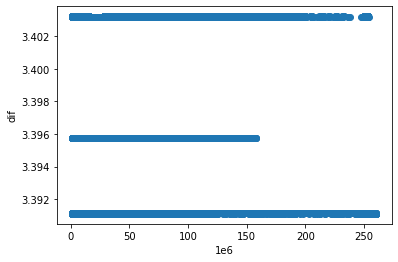

In [27]:
md1,md2='1e7','1e6.bc'

plt.figure()
plt.scatter(dic_score['1e6']['LD:AN:all'], dic_score['1e6.bc']['LD:AN:all']-dic_score['1e6']['LD:AN:all'])
# min_ = max(plt.xlim()[0], plt.ylim()[0])
# max_ = max(plt.xlim()[1], plt.ylim()[1])
# plt.plot([min_, max_], [min_, max_])
# plt.title('corr=%0.5f, mean_dif=%0.5f' % 
#           (np.corrcoef(dic_score[md1]['LD:AN:all'], dic_score[md2]['LD:AN:all'])[0,1],
#            np.mean(dic_score[md2]['LD:AN:all']-dic_score[md1]['LD:AN:all'])
#           ))
plt.xlabel('1e6')
plt.ylabel('dif')
plt.show()

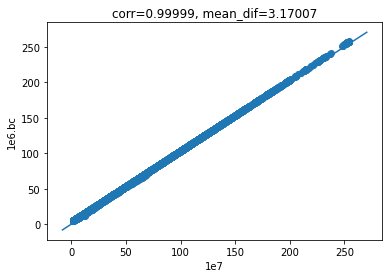

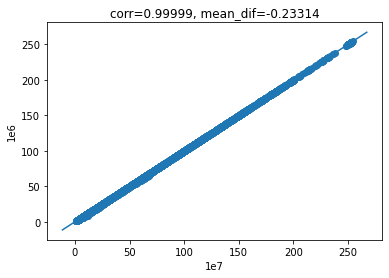

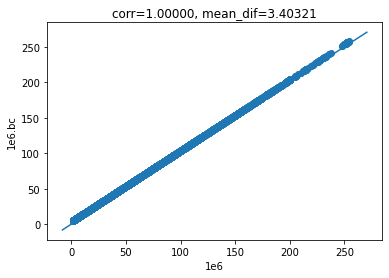

In [17]:
md1,md2='1e7','1e6.bc'

for md1,md2 in [['1e7','1e6.bc'], ['1e7','1e6'], ['1e6','1e6.bc']]:
    plt.figure()
    plt.scatter(dic_score[md1]['LD:AN:all'], dic_score[md2]['LD:AN:all'])
    min_ = max(plt.xlim()[0], plt.ylim()[0])
    max_ = max(plt.xlim()[1], plt.ylim()[1])
    plt.plot([min_, max_], [min_, max_])
    plt.title('corr=%0.5f, mean_dif=%0.5f' % 
              (np.corrcoef(dic_score[md1]['LD:AN:all'], dic_score[md2]['LD:AN:all'])[0,1],
               np.mean(dic_score[md2]['LD:AN:all']-dic_score[md1]['LD:AN:all'])
              ))
    plt.xlabel(md1)
    plt.ylabel(md2)
    plt.show()

In [7]:
dic_score['1e6.bc']['LD:AN:all']

0      7.646459
1      8.892612
2      9.723237
3      6.282910
4      4.969472
5      5.283273
6     10.735214
7      5.714860
8      7.766189
9     11.035957
10     9.095862
11     7.926158
12    10.867861
13     9.883809
14     9.723213
15     6.942935
16    34.881966
17    50.355114
18    37.436195
19    23.756325
20    36.875570
21     6.233843
22    37.605873
23    36.962067
24    17.556654
25    19.312153
26    19.036167
27    25.979200
28    40.002834
29    24.232086
Name: LD:AN:all, dtype: float64

In [5]:
dic_score['1e6']['LD:AN:all']

0      4.243245
1      5.489397
2      6.320023
3      2.879696
4      1.566257
5      1.880058
6      7.332000
7      2.311646
8      4.362974
9      7.632743
10     5.692648
11     4.522943
12     7.464647
13     6.480595
14     6.319999
15     3.539721
16    31.478750
17    46.951900
18    34.032980
19    20.353111
20    33.472355
21     2.830629
22    34.202660
23    33.558853
24    14.153440
25    15.908938
26    15.632953
27    22.575987
28    36.599620
29    20.828873
Name: LD:AN:all, dtype: float64

In [6]:
dic_score['1e7']['LD:AN:all']

0      4.357446
1      5.588366
2      6.453327
3      2.947614
4      1.646488
5      1.974377
6      7.431457
7      2.399964
8      4.473535
9      7.935792
10     5.778858
11     4.617073
12     7.569683
13     6.570342
14     6.453299
15     3.649819
16    31.585833
17    47.040268
18    34.143147
19    20.410616
20    33.581070
21     2.943869
22    34.314520
23    33.668526
24    14.255892
25    15.998673
26    15.690734
27    22.638433
28    36.701977
29    20.886223
Name: LD:AN:all, dtype: float64